<div> 
<img src="יער.jpg" width="600px",length="600px">
</div>

***Presenting by:***

**Netanel Cohen Klas**

**Ariel Cohen**

**Ravid Erez**


**Table of Contents:**


**Performing import and reading of a database**

http://www.authentic-happiness.com/

In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import date
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.ticker as mtick


In [299]:
url = 'https://raw.githubusercontent.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/main/Wellbeing_and_lifestyle_data_Kaggle.csv'
life_df = pd.read_csv(url)

In [17]:
len(life_df)

15972

In [18]:
life_df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [19]:
life_df.shape

(15972, 24)

In [20]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [21]:
life_df.describe(include = 'object')

,Timestamp,DAILY_STRESS,AGE,GENDER
count,15972,15972,15972,15972
unique,7002,7,4,2
top,7/23/18,3,21 to 35,Female
freq,162,4398,6108,9858


In [22]:
life_df[['AGE']].value_counts()

AGE         
21 to 35        6108
36 to 50        4655
51 or more      3390
Less than 20    1819
Name: count, dtype: int64

In [23]:
life_df[['GENDER']].value_counts()

GENDER
Female    9858
Male      6114
Name: count, dtype: int64

In [24]:
life_df[['TODO_COMPLETED']].value_counts()

TODO_COMPLETED
8                 2587
7                 2553
5                 2092
6                 1666
3                 1414
4                 1326
10                1083
9                 1079
2                 1033
1                  599
0                  540
Name: count, dtype: int64

In [25]:
life_df.groupby(['AGE'])[['DONATION']].sum()\
                                     .reset_index()\
                                     .sort_values(by='DONATION',ascending=False)

,AGE,DONATION
0,21 to 35,14492
1,36 to 50,13681
2,51 or more,11368
3,Less than 20,3828


In [26]:
life_df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [27]:
life_df.isnull().sum().sort_values(ascending=True)

Timestamp                  0
AGE                        0
WEEKLY_MEDITATION          0
TIME_FOR_PASSION           0
PERSONAL_AWARDS            0
SUFFICIENT_INCOME          0
DAILY_SHOUTING             0
LOST_VACATION              0
SLEEP_HOURS                0
LIVE_VISION                0
DAILY_STEPS                0
FLOW                       0
TODO_COMPLETED             0
BMI_RANGE                  0
DONATION                   0
ACHIEVEMENT                0
SOCIAL_NETWORK             0
SUPPORTING_OTHERS          0
CORE_CIRCLE                0
PLACES_VISITED             0
DAILY_STRESS               0
FRUITS_VEGGIES             0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [82]:
def plot_correlation_heatmap(df, columns, method):
    correlation_data = df[columns].dropna()
    correlation_matrix = correlation_data.corr(method=method)
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap ({method.capitalize()} Method)')
    plt.show()

<Axes: >

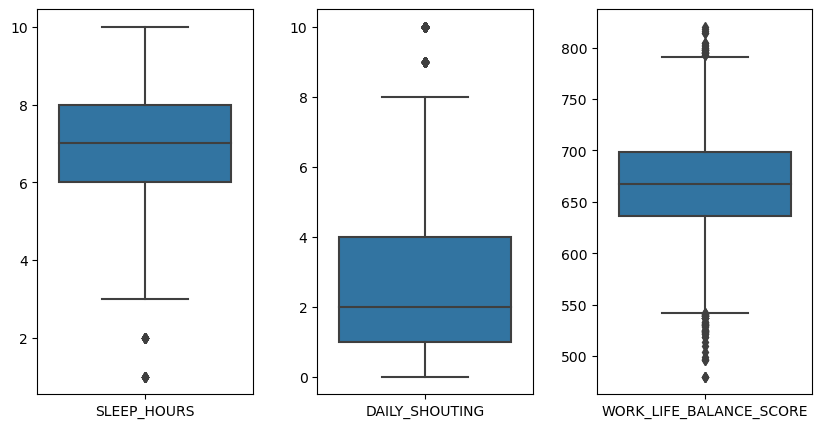

In [83]:
fig, ax = plt.subplots (figsize=(10, 5),  ncols=3)
plt.subplots_adjust(wspace = 0.3)
sns.boxplot(data = life_df[['SLEEP_HOURS']], ax = ax[0])
sns.boxplot(data = life_df[['DAILY_SHOUTING']], ax = ax[1])
sns.boxplot(data = life_df[['WORK_LIFE_BALANCE_SCORE']], ax = ax[2])

בהתבסס על הנתונים שהצגנו בגרף, ניתן להסיק את המסקנות הבאות לגבי הקשר בין חריגות בשעות השינה לבין העמודות השונות:
מסקנות מהנתונים:
DAILY_SHOUTING:
אנשים עם שעות שינה חריגות נוטים לדווח על רמות יומיות גבוהות יותר של צעקות או ריב עם אחרים לעומת אנשים עם שעות שינה רגילות הדבר יכול להעיד על כך ששעות שינה לא סדירות או לא מספקות עשויות לגרום לרמות מתח או כעס גבוהות יותר ביום יום.
ACHIEVEMENT:
אנשים עם שעות שינה רגילות נוטים לדווח על הישגים גבוהים יותר לעומת אנשים עם שעות שינה חריגות. הדבר עשוי לרמז על כך ששעות שינה סדירות ומספקות תורמות לרמת הישגים גבוהה יותר, אולי עקב ריכוז טוב יותר ויכולת תפקוד משופרת במהלך היום.
TODO_COMPLETED:
אנשים עם שעות שינה רגילות מדווחים על השלמת יותר משימות יומיות לעומת אנשים עם שעות שינה חריגות. הדבר יכול להצביע על כך ששינה מספקת משפרת את היכולת לנהל זמן ולהשלים משימות בצורה יעילה יותר.
TIME_FOR_PASSION:
אנשים עם שעות שינה רגילות נוטים להקדיש יותר זמן לפעילויות שהם אוהבים לעומת אנשים עם שעות שינה חריגות. זה עשוי לרמז על כך ששעות שינה מספקות מאפשרות לאנשים להקדיש זמן לתשוקות ולתחביבים שלהם, מה שמשפר את רמת שביעות הרצון והאיזון בחיים.
סיכום:
הנתונים מראים כי חריגות בשעות השינה עשויות להשפיע לרעה על היבטים שונים של החיים, כולל רמות מתח, הישגים, ניהול זמן והקדשת זמן לתחביבים. שמירה על שעות שינה סדירות ומספקות עשויה לתרום לרמת תפקוד גבוהה יותר ולשיפור הרווחה הכללית.


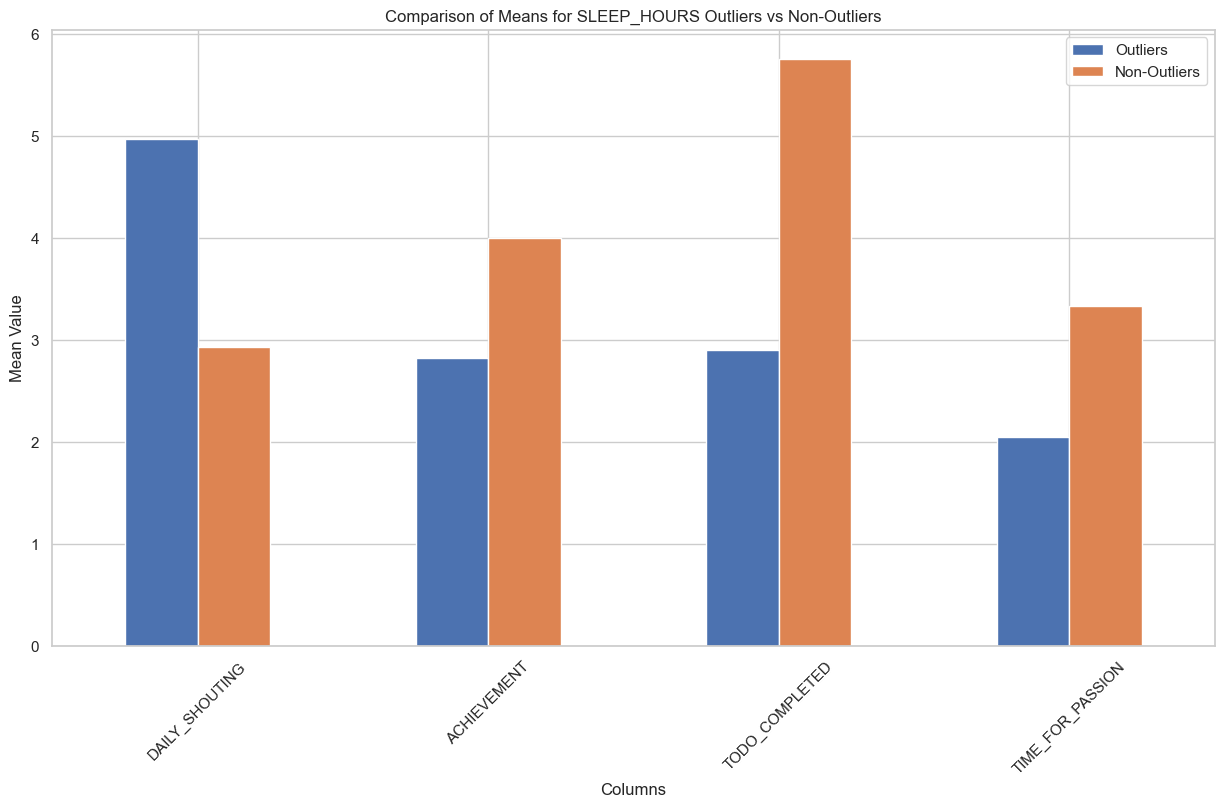

In [363]:

def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers
columns_to_exclude = ['AGE', 'DATE', 'DAILY_STRESS', 'GENDER']
columns_to_include = ['DAILY_SHOUTING','ACHIEVEMENT', 'TODO_COMPLETED', 'TIME_FOR_PASSION']
outliers_sleep_hours = find_outliers(life_df, 'SLEEP_HOURS')
life_df['SLEEP_HOURS_OUTLIER'] = life_df.index.isin(outliers_sleep_hours.index)
mean_outliers = life_df[life_df['SLEEP_HOURS_OUTLIER']][columns_to_include].mean()
mean_non_outliers = life_df[~life_df['SLEEP_HOURS_OUTLIER']][columns_to_include].mean()
comparison_df = pd.DataFrame({'Outliers': mean_outliers, 'Non-Outliers': mean_non_outliers})
comparison_df.plot(kind='bar', figsize=(15, 8))
plt.title('Comparison of Means for SLEEP_HOURS Outliers vs Non-Outliers')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()


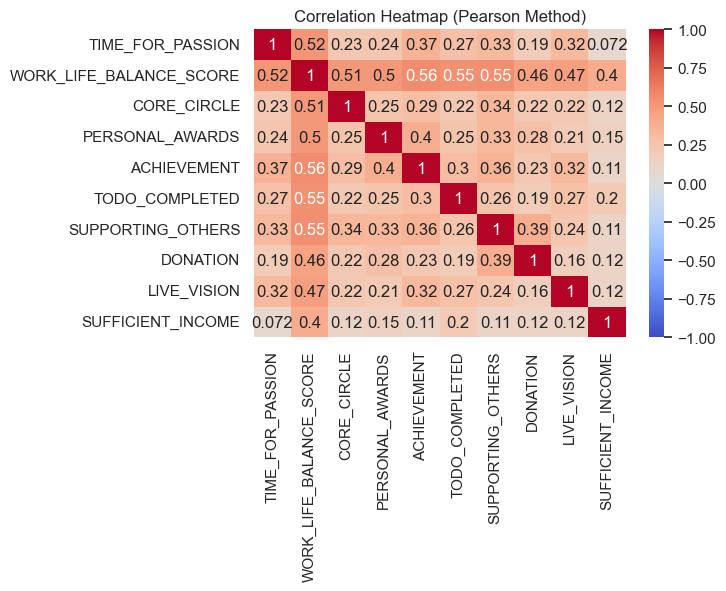

In [365]:
plot_correlation_heatmap(life_df, ["TIME_FOR_PASSION","WORK_LIFE_BALANCE_SCORE","CORE_CIRCLE","PERSONAL_AWARDS","ACHIEVEMENT","TODO_COMPLETED","SUPPORTING_OTHERS","DONATION","LIVE_VISION","SUFFICIENT_INCOME"],"pearson")

In [ ]:
אם הקורלציה חיובית גבוהה, זה מצביע על כך שאנשים שמקדישים יותר זמן לפעילויות שהם אוהבים נהנים מאיזון טוב יותר בין העבודה לחיים פרטיים. הדבר עשוי להצביע על כך שעיסוק בתחביבים ופעילויות מועדפות תורם לרווחה כללית ולאיזון בחיים.

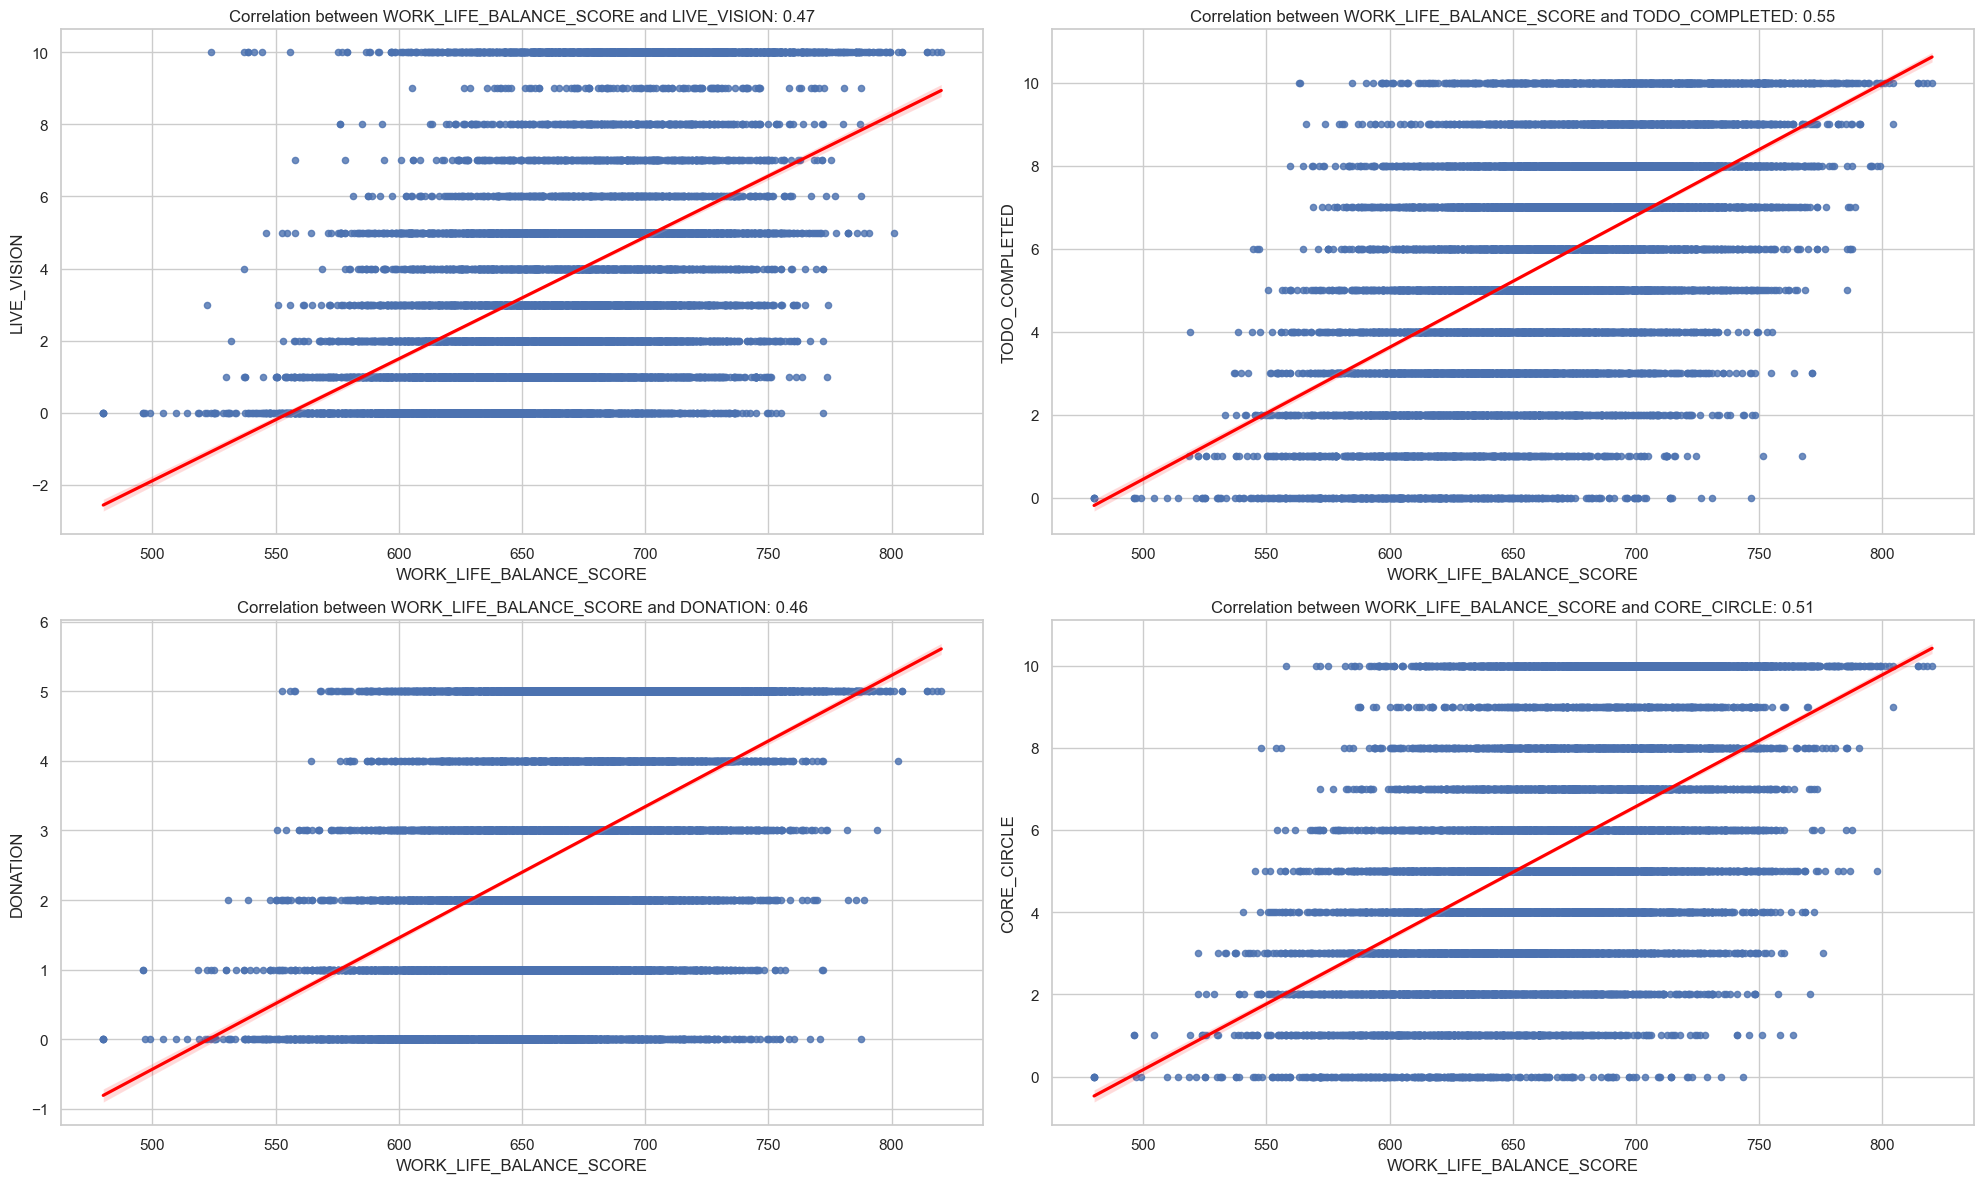

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to correlate with WORK_LIFE_BALANCE_SCORE
columns_to_correlate = ['LIVE_VISION', 'TODO_COMPLETED', 'DONATION', 'CORE_CIRCLE']

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

# Plot correlation scatter plots with regression lines
for i, col in enumerate(columns_to_correlate):
    correlation = life_df[['WORK_LIFE_BALANCE_SCORE', col]].corr().iloc[0, 1]
    sns.regplot(x='WORK_LIFE_BALANCE_SCORE', y=col, data=life_df, scatter_kws={'s':20}, line_kws={'color':'red'}, ax=axes[i])
    axes[i].set_title(f'Correlation between WORK_LIFE_BALANCE_SCORE and {col}: {correlation:.2f}')
    axes[i].set_xlabel('WORK_LIFE_BALANCE_SCORE')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


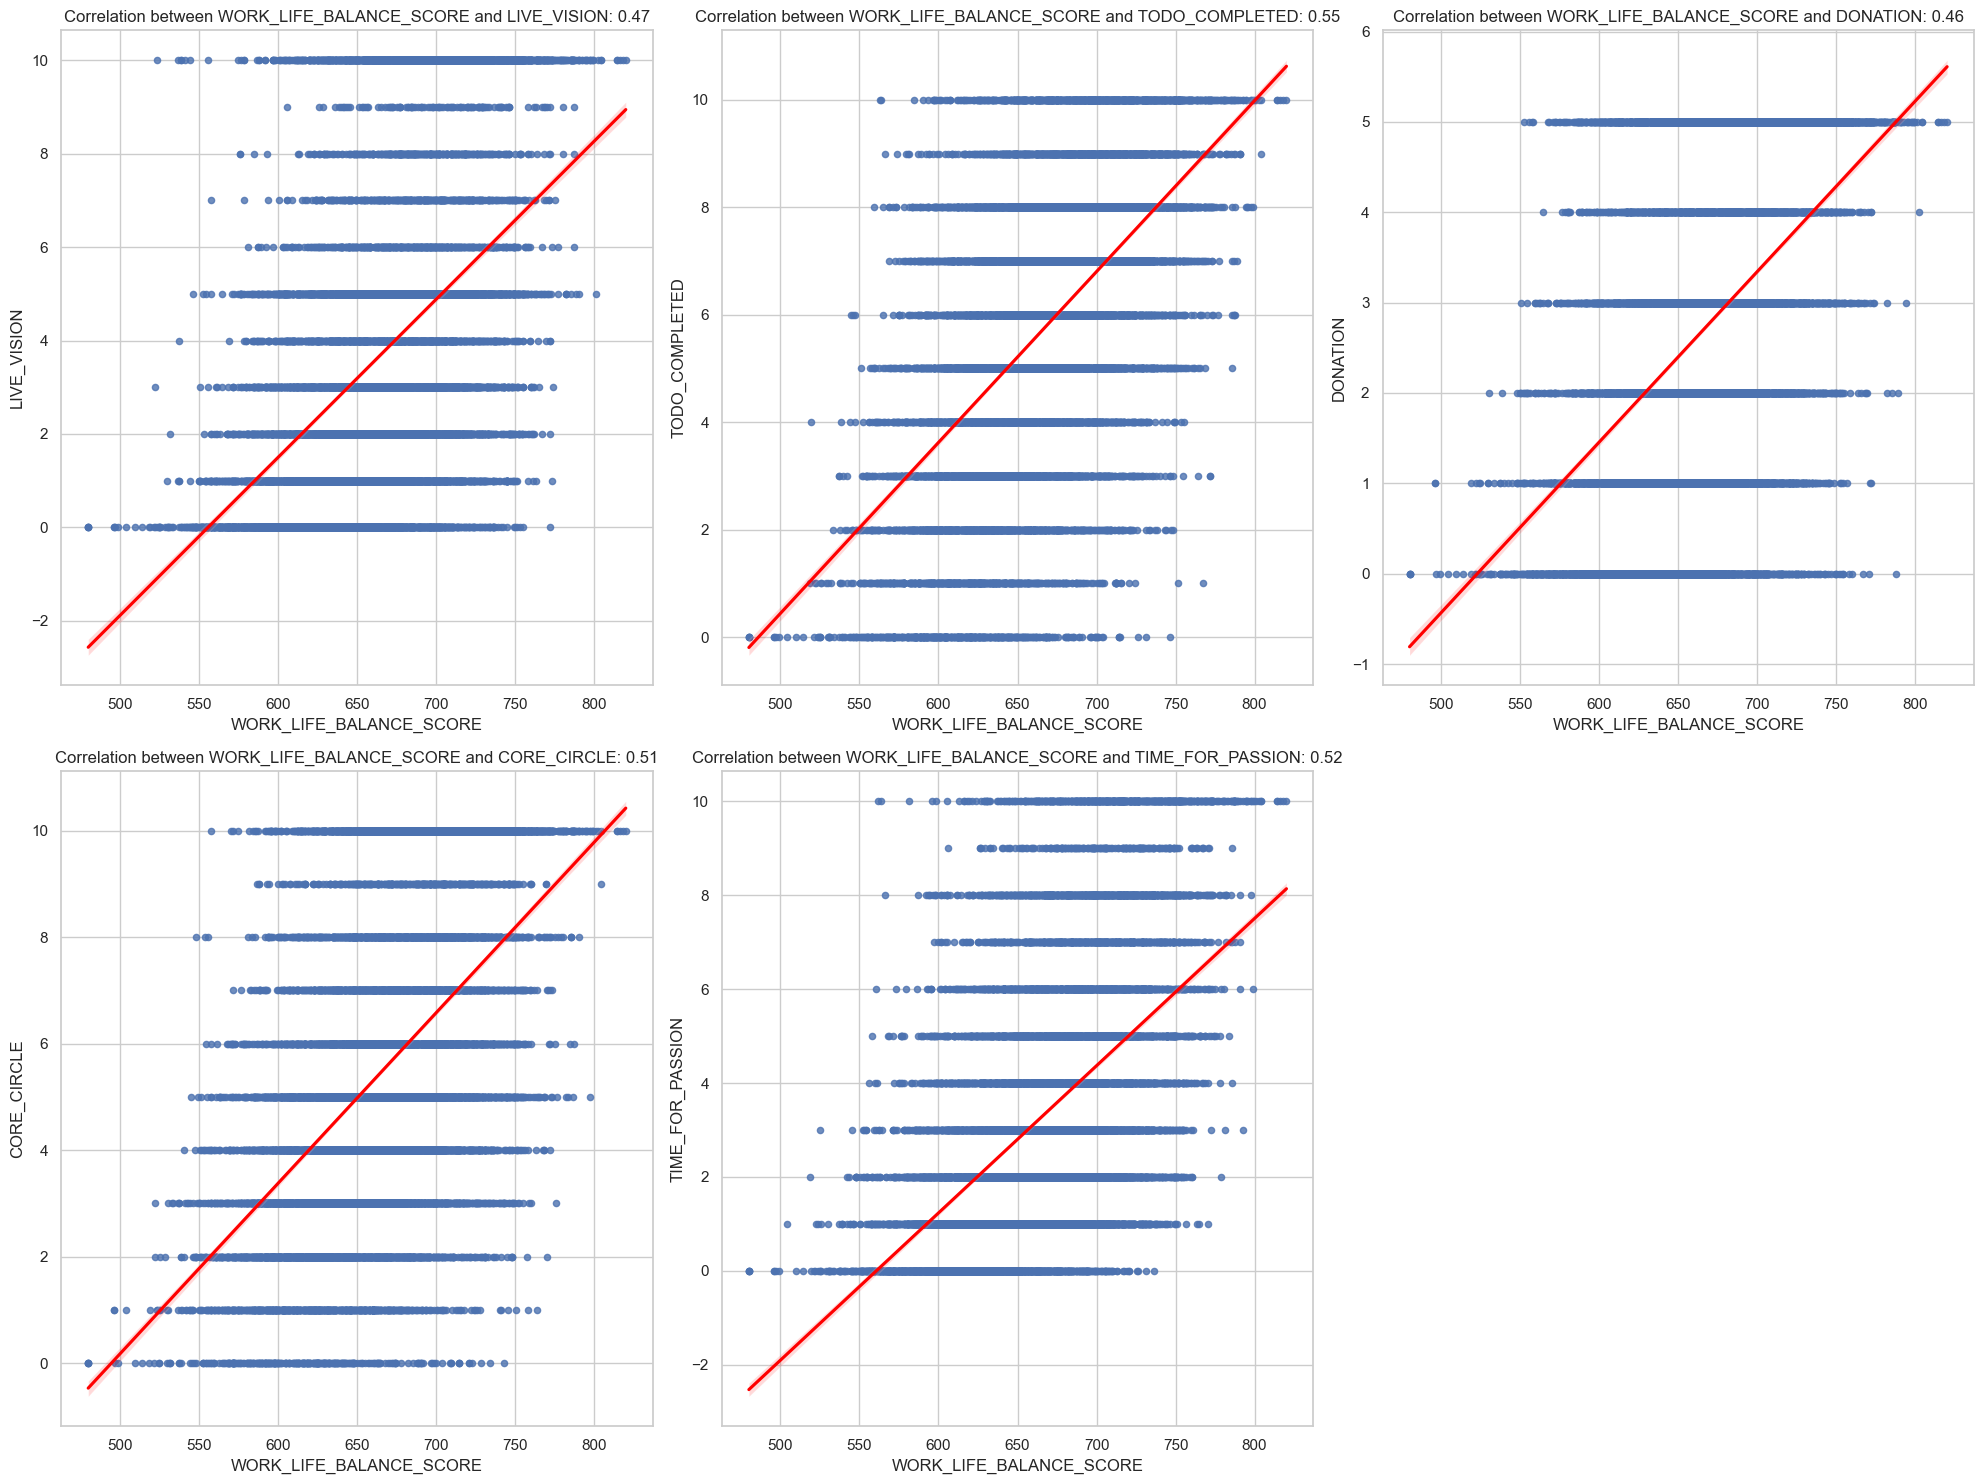

In [380]:

columns_to_correlate = ['LIVE_VISION', 'TODO_COMPLETED', 'DONATION', 'CORE_CIRCLE', 'TIME_FOR_PASSION']
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(columns_to_correlate):
    correlation = life_df[['WORK_LIFE_BALANCE_SCORE', col]].corr().iloc[0, 1]
    sns.regplot(x='WORK_LIFE_BALANCE_SCORE', y=col, data=life_df, scatter_kws={'s':20}, line_kws={'color':'red'}, ax=axes[i])
    axes[i].set_title(f'Correlation between WORK_LIFE_BALANCE_SCORE and {col}: {correlation:.2f}')
    axes[i].set_xlabel('WORK_LIFE_BALANCE_SCORE')
    axes[i].set_ylabel(col)
if len(columns_to_correlate) < len(axes):
    fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


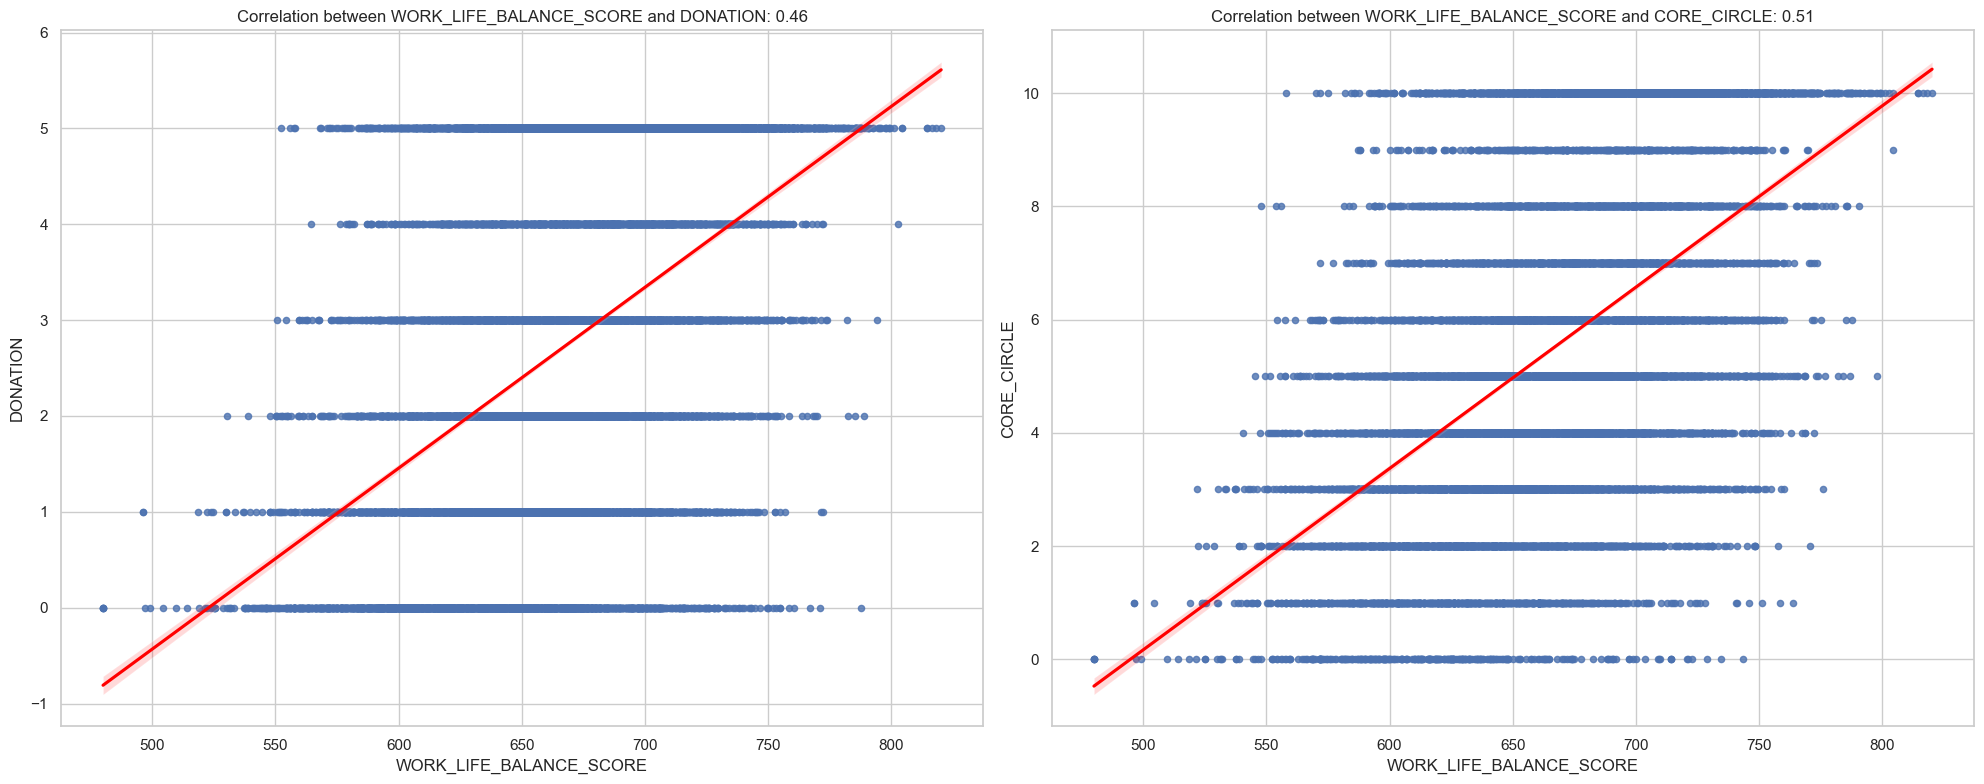

In [382]:
import seaborn as sns
import matplotlib.pyplot as plt

# רשימת העמודות לבדוק קורלציה עם WORK_LIFE_BALANCE_SCORE
columns_to_correlate = ['DONATION', 'CORE_CIRCLE']

# יצירת דמות עם גרפים תת-חלקים
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes = axes.flatten()

# גרף פיזור עם קווי רגרסיה
for i, col in enumerate(columns_to_correlate):
    correlation = life_df[['WORK_LIFE_BALANCE_SCORE', col]].corr().iloc[0, 1]
    sns.regplot(x='WORK_LIFE_BALANCE_SCORE', y=col, data=life_df, scatter_kws={'s':20}, line_kws={'color':'red'}, ax=axes[i])
    axes[i].set_title(f'Correlation between WORK_LIFE_BALANCE_SCORE and {col}: {correlation:.2f}')
    axes[i].set_xlabel('WORK_LIFE_BALANCE_SCORE')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()



In [95]:
life_df.groupby(['AGE','GENDER'])[['TIME_FOR_PASSION','WORK_LIFE_BALANCE_SCORE']].mean()

TIME_FOR_PASSION  WORK_LIFE_BALANCE_SCORE
AGE          GENDER                                           
21 to 35     Female          3.322508               662.017509
             Male            3.308142               659.772341
36 to 50     Female          3.209726               669.008342
             Male            3.257969               664.180224
51 or more   Female          3.421650               678.510127
             Male            3.573248               676.048863
Less than 20 Female          3.127700               664.009577
             Male            3.653846               664.251724

In [149]:
life_df['AGE'] = life_df['AGE'].map({'Less than 20':'0 to 20','21 to 35':'21 to 35', '36 to 50':'36 to 50', '51 or more' : '51 or more'})

In [154]:
features = ['TIME_FOR_PASSION',"CORE_CIRCLE","SUPPORTING_OTHERS",'SOCIAL_NETWORK',"DONATION"]
small_fit = pd.get_dummies(life_df[features])
small_fit

,TIME_FOR_PASSION,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,DONATION
0,0,5,0,5,0
1,2,3,8,10,2
2,8,4,4,10,2
3,2,3,10,7,5
4,1,3,10,4,4
...,...,...,...,...,...
15967,2,4,0,10,4
15968,5,8,7,4,3
15969,1,10,10,8,5
15970,6,8,2,7,2


**מסקנה ראשונה

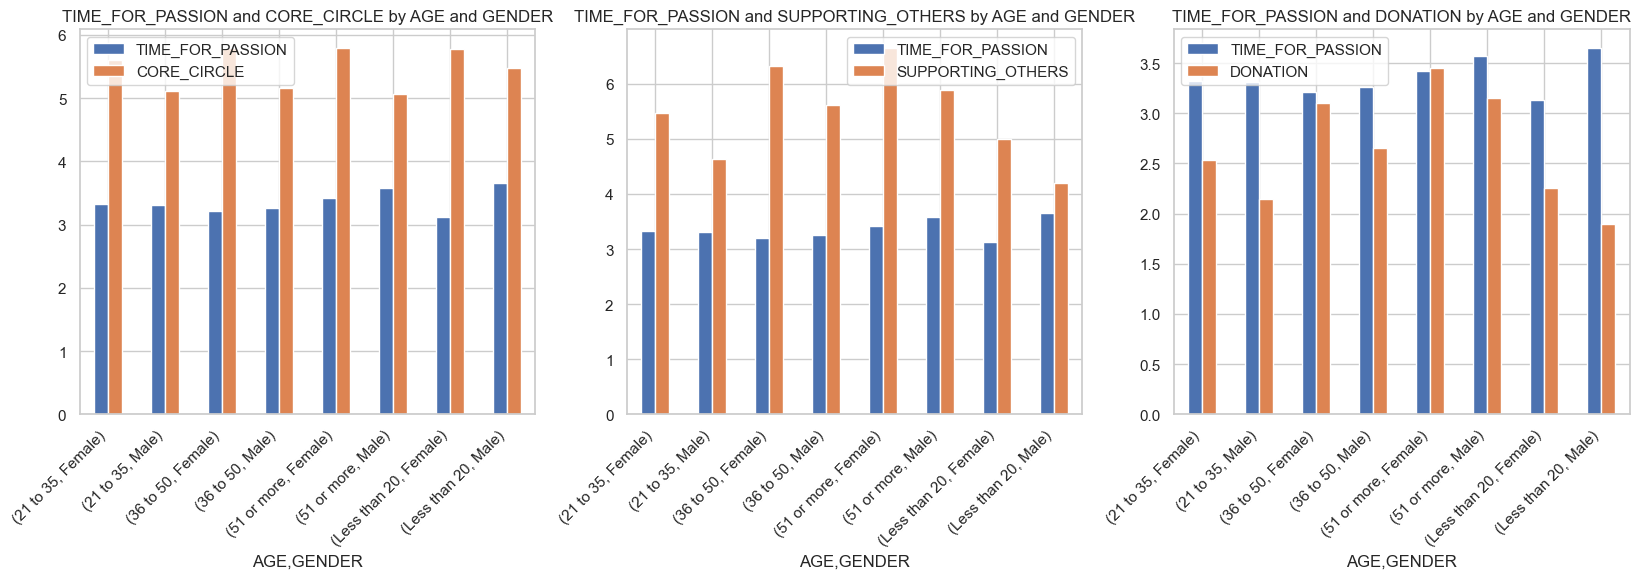

In [337]:
fig, axes= plt.subplots(figsize=(20,5), ncols = 3)
life_df.groupby(['AGE','GENDER'])[['TIME_FOR_PASSION',"CORE_CIRCLE"]].mean().plot.bar(ax =axes[0])
axes[0].set_title('TIME_FOR_PASSION and CORE_CIRCLE by AGE and GENDER')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
life_df.groupby(['AGE','GENDER'])[['TIME_FOR_PASSION',"SUPPORTING_OTHERS"]].mean().plot.bar(ax =axes[1])
axes[1].set_title('TIME_FOR_PASSION and SUPPORTING_OTHERS by AGE and GENDER')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
life_df.groupby(['AGE','GENDER'])[['TIME_FOR_PASSION',"DONATION"]].mean().plot.bar(ax =axes[2])
axes[2].set_title('TIME_FOR_PASSION and DONATION by AGE and GENDER')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
plt.show()

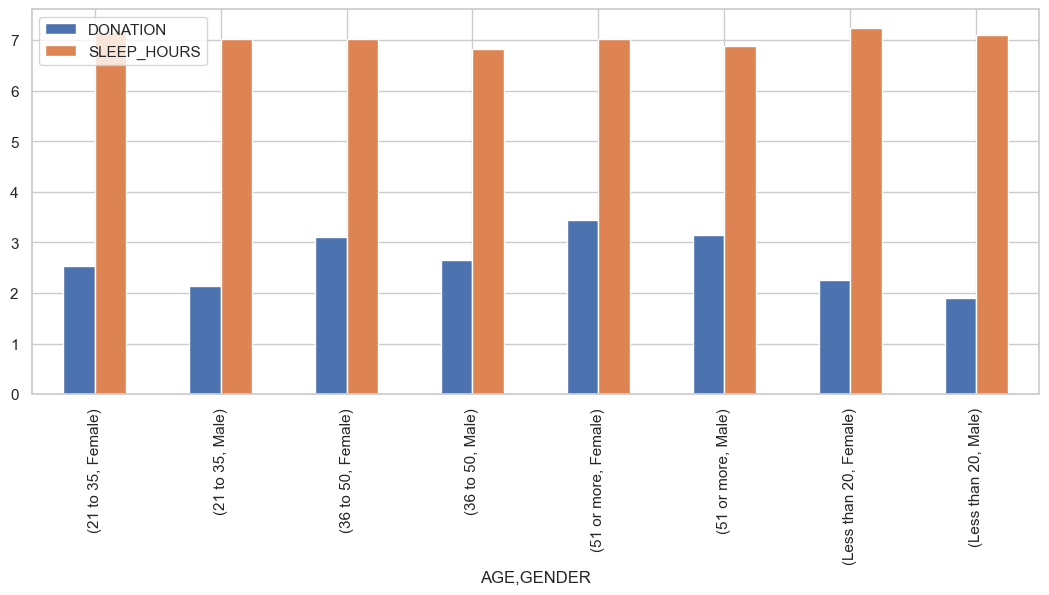

In [355]:
life_df.groupby(['AGE','GENDER'])[['DONATION',"SLEEP_HOURS"]].mean().plot.bar(figsize=(13,5))
plt.show()

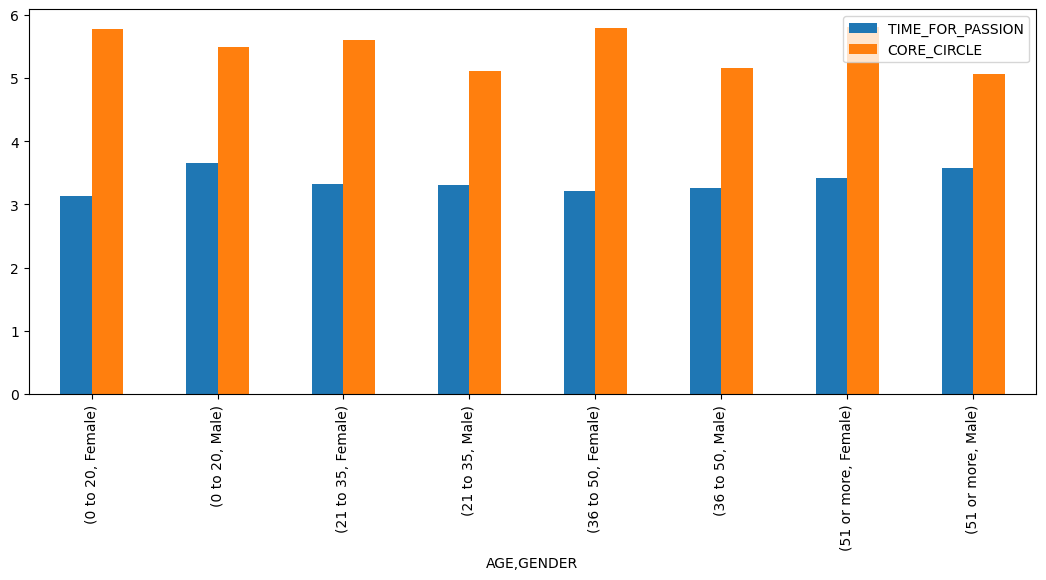

In [162]:
life_df.groupby(['AGE','GENDER'])[['TIME_FOR_PASSION',"CORE_CIRCLE"]].mean().plot.bar(figsize=(13,5))
plt.show()

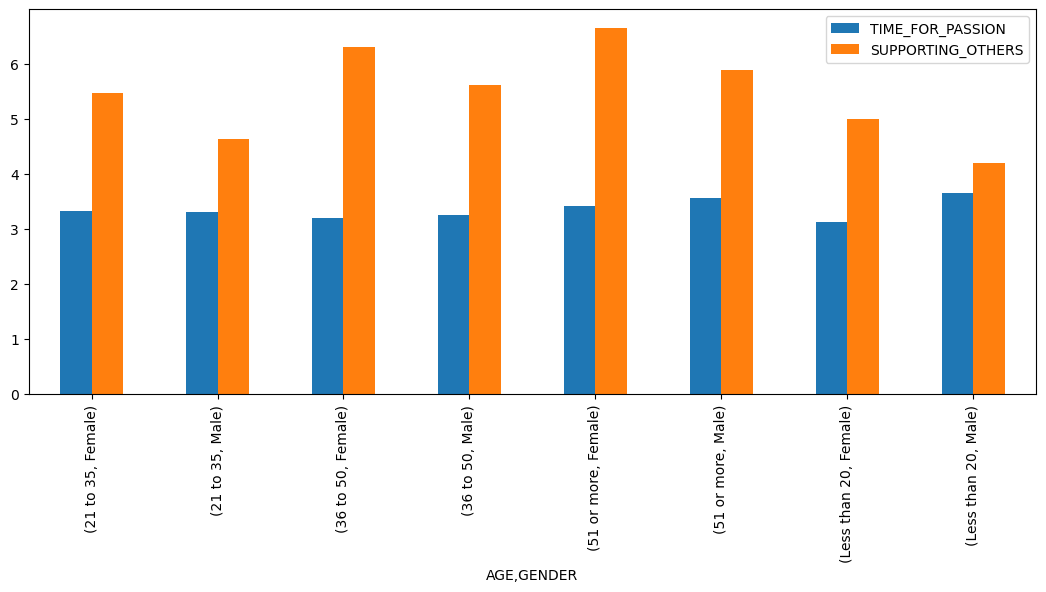

In [119]:
life_df.groupby(['AGE','GENDER'])[['TIME_FOR_PASSION',"SUPPORTING_OTHERS"]].mean().plot.bar(figsize=(13,5))
plt.show()

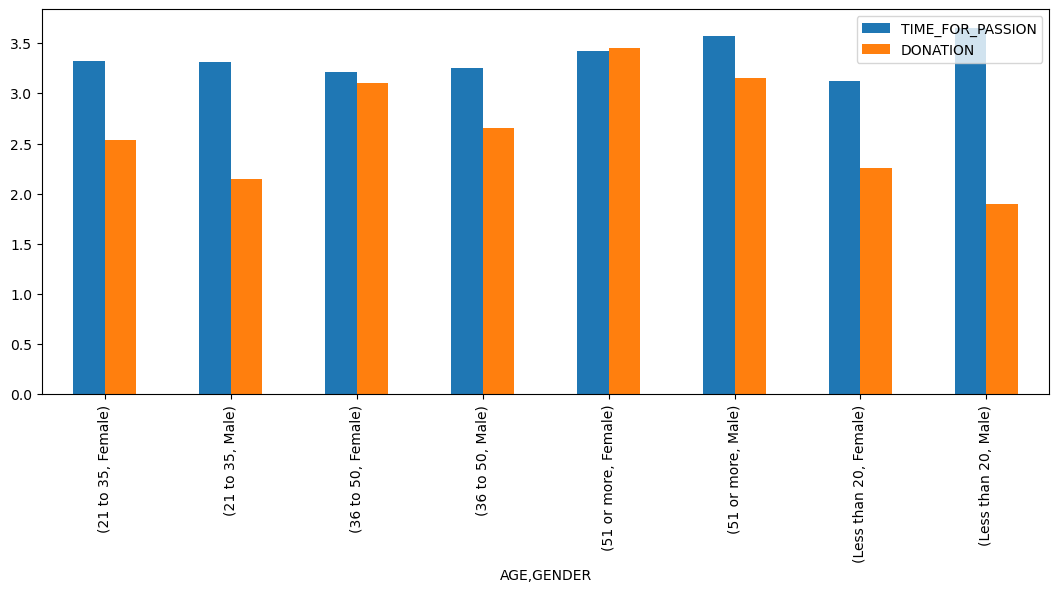

In [124]:
life_df.groupby(['AGE','GENDER'])[['TIME_FOR_PASSION',"DONATION"]].mean().plot.bar(figsize=(13,5))
plt.show()

In [ ]:
ניתן לראות על פי הגרפים

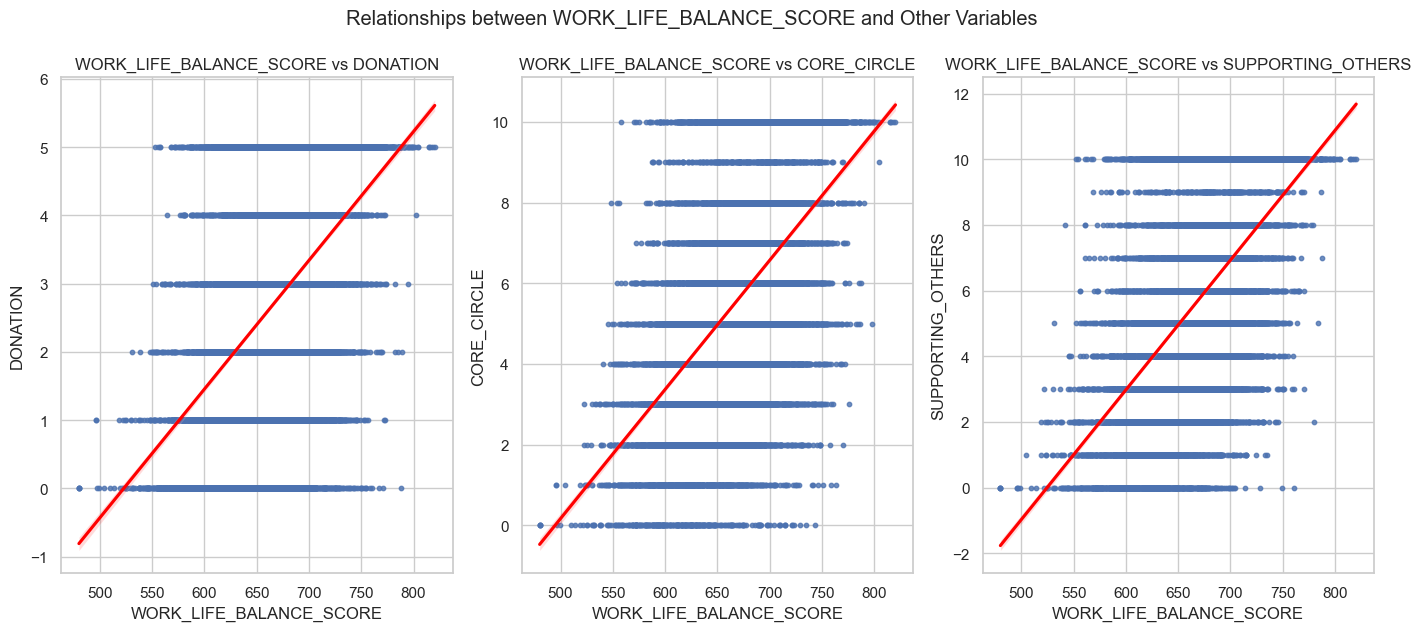

In [352]:

relevant_columns = life_df[['WORK_LIFE_BALANCE_SCORE', 'DONATION', 'CORE_CIRCLE', 'SUPPORTING_OTHERS']]
fig, axes = plt.subplots(1, 3, figsize=(14, 6))
sns.regplot(x='WORK_LIFE_BALANCE_SCORE', y='DONATION', data=relevant_columns, ax=axes[0], scatter_kws={'s':10}, line_kws={'color':'red'})
axes[0].set_title('WORK_LIFE_BALANCE_SCORE vs DONATION')
sns.regplot(x='WORK_LIFE_BALANCE_SCORE', y='CORE_CIRCLE', data=relevant_columns, ax=axes[1], scatter_kws={'s':10}, line_kws={'color':'red'})
axes[1].set_title('WORK_LIFE_BALANCE_SCORE vs CORE_CIRCLE')
sns.regplot(x='WORK_LIFE_BALANCE_SCORE', y='SUPPORTING_OTHERS', data=relevant_columns, ax=axes[2], scatter_kws={'s':10}, line_kws={'color':'red'})
axes[2].set_title('WORK_LIFE_BALANCE_SCORE vs SUPPORTING_OTHERS')
plt.tight_layout()
plt.suptitle('Relationships between WORK_LIFE_BALANCE_SCORE and Other Variables', y=1.05)
plt.show()

In [319]:
z

AGE
21 to 35        22.031055
36 to 50        27.290039
51 or more      31.137975
Less than 20    19.540930
Name: DONATION, dtype: float64

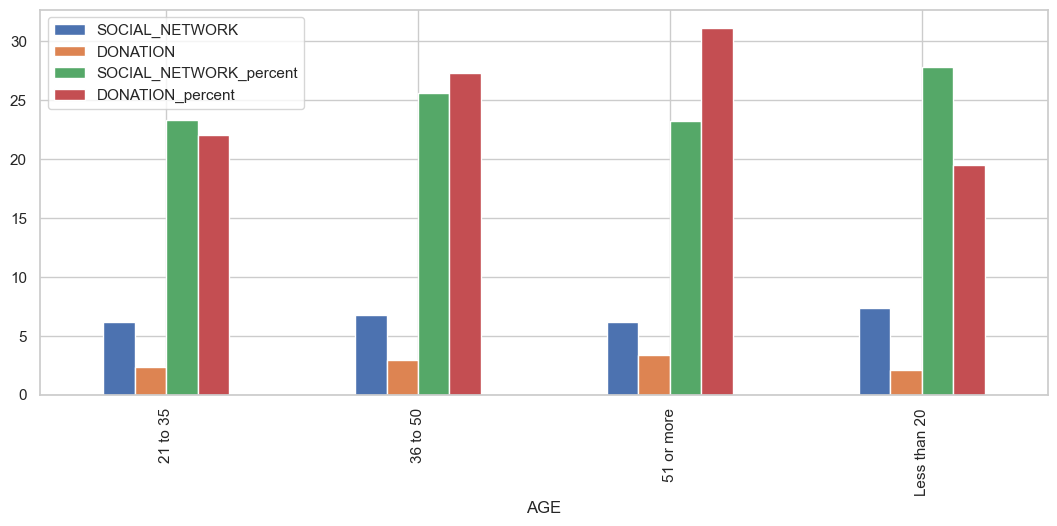

In [320]:
x = life_df.groupby(['AGE'])[['SOCIAL_NETWORK', 'DONATION']].mean()
x['SOCIAL_NETWORK_percent'] = x['SOCIAL_NETWORK'] / x['SOCIAL_NETWORK'].sum() * 100
x['DONATION_percent'] = x['DONATION'] / x['DONATION'].sum() * 100
x.plot.bar(figsize=(13,5))
plt.show()

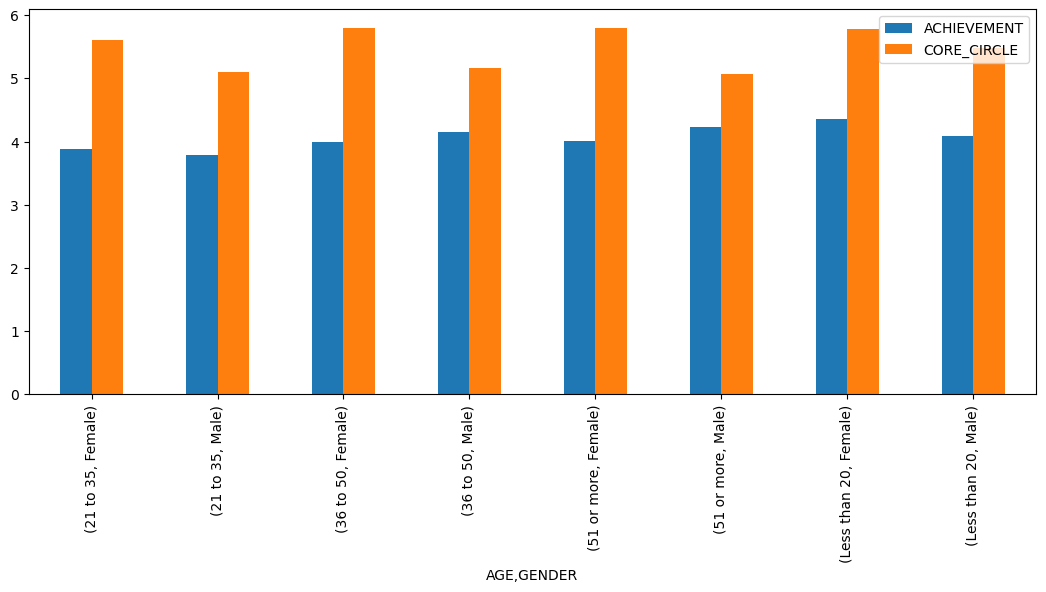

In [122]:
life_df.groupby(['AGE','GENDER'])[['ACHIEVEMENT',"CORE_CIRCLE"]].mean().plot.bar(figsize=(13,5))
plt.show()

In [301]:
life_df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [303]:
life_df['DAILY_STRESS']

0        2
1        3
2        3
3        3
4        1
        ..
15967    3
15968    3
15969    3
15970    1
15971    4
Name: DAILY_STRESS, Length: 15972, dtype: object

In [304]:

life_df['DAILY_STRESS'] = life_df['DAILY_STRESS'].astype(pd.Int64Dtype())

ValueError: invalid literal for int() with base 10: '01/01/2000'

In [255]:
life_df['DAILY_STRESS'] = pd.to_numeric(life_df['DAILY_STRESS'], errors='coerce')

NameError: name 'DAILY_STRESS' is not defined

In [241]:
Numeric_columns = life_df[[
    'CORE_CIRCLE','SUPPORTING_OTHERS','SOCIAL_NETWORK','ACHIEVEMENT',
       'DONATION','BMI_RANGE','TODO_COMPLETED','DAILY_STEPS',
       'LIVE_VISION','SLEEP_HOURS','DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS','TIME_FOR_PASSION',
       'WEEKLY_MEDITATION','WORK_LIFE_BALANCE_SCORE']]

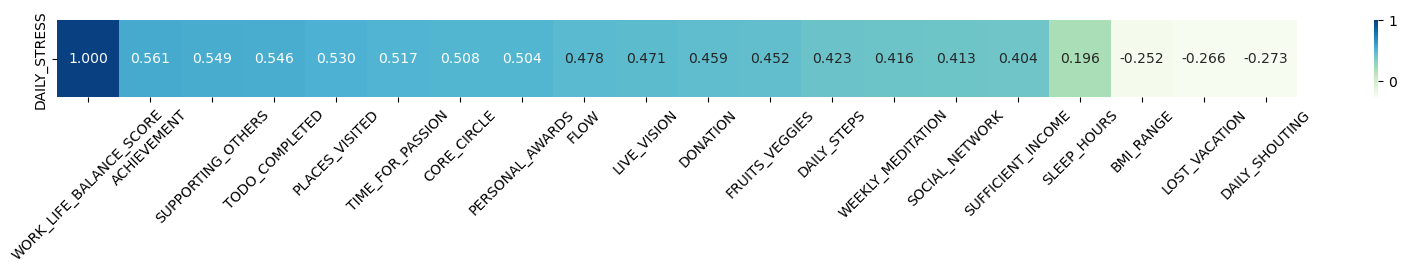

In [239]:
WLB_corr = Numeric_columns.corr().iloc[-1]
plt.figure(figsize=(20,1))
life_df = pd.DataFrame({cname: WLB_corr[WLB_corr.index==cname].iloc[0] for cname in WLB_corr.index}, index=['DAILY_STRESS'])
life_df.sort_values(axis=1, by='DAILY_STRESS', inplace=True, ascending=False)
life_df.drop(['DAILY_STRESS'], axis=1, inplace=True)
sns.heatmap(life_df, annot=True, fmt='0.3f', cmap='GnBu');
plt.xticks(rotation=45);

מסקנה שנייה****

In [308]:

so_corr = life_df.corr()['SUPPORTING_OTHERS'] 
life_df = pd.DataFrame(so_corr).T
life_df.sort_values(axis=1, by='SUPPORTING_OTHERS', inplace=True, ascending=False)
life_df.drop('SUPPORTING_OTHERS', inplace=True, axis=1)
plt.figure(figsize=(20, 1))
sns.heatmap(df_piv, annot=True, fmt='.3f', cmap='PuBu')
plt.xticks(rotation=90)
plt.title('Supporting Others', size=30)
plt.show()


ValueError: could not convert string to float: '07/07/2015'

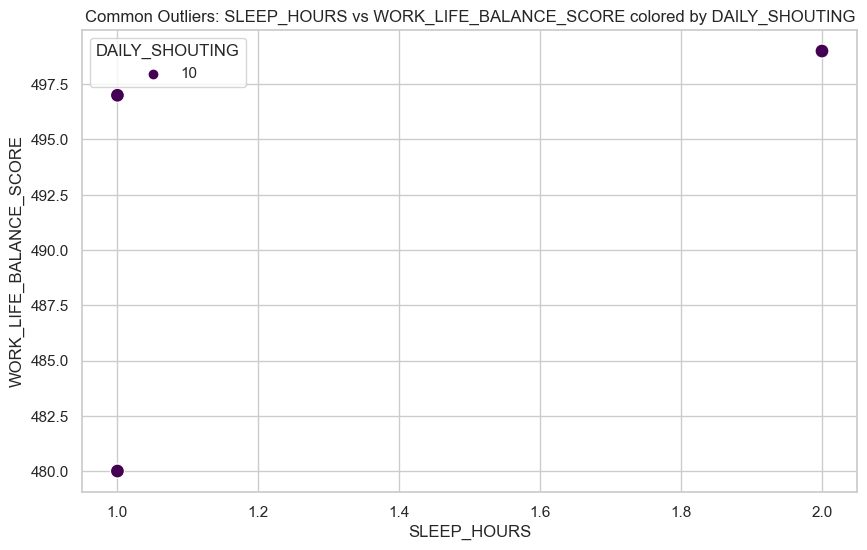

In [305]:


# מציאת חריגים בעזרת שיטת ה-IQR
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers

outliers_sleep_hours = find_outliers(life_df, 'SLEEP_HOURS')
outliers_daily_shouting = find_outliers(life_df, 'DAILY_SHOUTING')
outliers_work_life_balance_score = find_outliers(life_df, 'WORK_LIFE_BALANCE_SCORE')

# איחוד החריגים כדי למצוא חריגים משותפים
common_outliers = pd.merge(outliers_sleep_hours, outliers_daily_shouting, how='inner', on=life_df.columns.tolist())
common_outliers = pd.merge(common_outliers, outliers_work_life_balance_score, how='inner', on=life_df.columns.tolist())

# Plot to show relationships with proper hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=common_outliers['SLEEP_HOURS'], y=common_outliers['WORK_LIFE_BALANCE_SCORE'], hue=common_outliers['DAILY_SHOUTING'], palette='viridis', s=100)
plt.title('Common Outliers: SLEEP_HOURS vs WORK_LIFE_BALANCE_SCORE colored by DAILY_SHOUTING')
plt.xlabel('SLEEP_HOURS')
plt.ylabel('WORK_LIFE_BALANCE_SCORE')
plt.show()
